# Looming Winter Security of Supply Problems in a Solar Dominated Electricity Market


### Barış Sanlı [barissanli2@gmail.com](http://barissanli.com)

#### [https://github.com/barissanli](https://github.com/barissanli)

#### Article available by 23rd March 2023 from (http://www.barissanli.com/calismalar/2023/20230323-wintersos.pdf)


#### Original articles in Turkish are available
* How Solar affects Supply Security [Güneş Arz Güvenliğine Nasıl Etki Ediyor?](http://www.barissanli.com/calismalar/2023/20230101-gunes.pdf)
* Solar and Storage in Winter Period [Kış döneminde güneş ve depolama] (http://www.barissanli.com/calismalar/2023/20230105-gunes2.pdf)


Date:17 March 2023

This is the open data/notebook for the article Accelerating Winter Security of Supply Problems. The article can be reached from (barissanli.com)

Main question is the dangers posed by relying on solar for winter security of supply based on aggregated annual data. If, one looks in detail, solar is practically not existent in winter during highest peak demand periods, while a great saviour for the rest of the year. Averaging the data shows clear benefits. But dissecting the data, hints about looming winter security of supply crisis on a much more solar based system


#### Data

Data is from 
* Ember Monthly Electricity Data , https://ember-climate.org/data-catalogue/monthly-electricity-data/
* Turkish Energy Exchange - Transparency Platform, https://seffaflik.epias.com.tr/transparency/
* EPDK - Turkish Energy Regulator's Monthly Reports (for monthly solar installed capacity) , https://www.epdk.gov.tr/Detay/Icerik/3-0-23/elektrikaylik-sektor-raporlar


#### Methods

Ember monthly data is used for European countries. Through this dataset, solar's share in demand is graphed. EPİAŞ data is used for monthly capacity factor for Turkish solar generation part. If 10000 MW's of solar is installed in the grid, it is practically 5000 MW base load equivalent for summer, but 1600 MW base load equivalent for winter. So replacing thermal resources with renewable has an asymmetric effect seasonally.



Python libraries needed are loaded

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import seaborn

Larger graph areas

In [3]:
plt.rcParams["figure.figsize"]=[12.0,6.0]


#### Data Dowload

First download Ember Monthly electricity data

In [4]:
import requests 
from urllib.request import urlopen

link="https://ember-climate.org/app/uploads/2022/07/monthly_full_release_long_format-2.csv"


# orjinal kod : https://stackoverflow.com/questions/65020294/downloading-a-zipped-file-using-python-3-7

def download_url(url, save_path, chunk_size=128):
    r = requests.get(url, stream=True)
    with open(save_path, 'wb') as fd:
        for chunk in r.iter_content(chunk_size=chunk_size):
            fd.write(chunk)

            
#ilk sefer indir, ikinci çalışmada tekrar tekrar indirmeye gerek kalmasın
download_url(link,"./ember.csv")

Read the data from downloaded file

In [5]:
df = pd.read_csv('ember.csv')


In [6]:
df.head(2)

,Area,Country code,Date,Area type,Continent,Ember region,EU,OECD,G20,G7,Category,Subcategory,Variable,Unit,Value,YoY absolute change,YoY % change
0,Argentina,ARG,2018-01-01,Country,South America,Latin America and Caribbean,0.0,0.0,1.0,0.0,Electricity demand,Demand,Demand,TWh,12.77,NaN,NaN
1,Argentina,ARG,2018-01-01,Country,South America,Latin America and Caribbean,0.0,0.0,1.0,0.0,Electricity generation,Aggregate fuel,Clean,%,34.57,NaN,NaN


Ember data is monthly, but python sees the data as Year-Month-Day so we first convert it to datetime object, followed by Year-Month conversion

In [7]:
from datetime import datetime
df['Date']=(pd.to_datetime(df['Date'], format="%Y-%m-%d")).dt.strftime('%Y-%m')

In [8]:
df=df[df['Date']>"2017-01"]

In [9]:
df.head(2)

,Area,Country code,Date,Area type,Continent,Ember region,EU,OECD,G20,G7,Category,Subcategory,Variable,Unit,Value,YoY absolute change,YoY % change
0,Argentina,ARG,2018-01,Country,South America,Latin America and Caribbean,0.0,0.0,1.0,0.0,Electricity demand,Demand,Demand,TWh,12.77,NaN,NaN
1,Argentina,ARG,2018-01,Country,South America,Latin America and Caribbean,0.0,0.0,1.0,0.0,Electricity generation,Aggregate fuel,Clean,%,34.57,NaN,NaN


In [10]:
seaborn.set_theme()

## What is the difference between share in demand and absolute generation?

In most of the analysis, we will use share in demand. Because we want to observe how solar satisfies demand. However, in some countries the two data makes a difference.

* If a country's demand is increasing (like a developing country), the solar share may decrease
* If a country's demand is stable, we expect solar's share to increase

Therefore we first define a function that can plot both % share and TWh generation in the same graph for two countries or for a single country

* If we want to compare two countries with the same unit (% or TWh), twoCountries_sameAxis(),
* If we want to compare % and TWh change for a country, twoAxis()

is used.

In [11]:
def twoCountries_sameAxis(c1,c2,ctip="%"):
    ulke=df[(df.Area==c1) & (df.Variable=='Solar') & (df.Unit==ctip) ];
    plt.plot(ulke.Date,ulke.Value, label=c1);
    ulke=df[(df.Area==c2) & (df.Variable=='Solar') & (df.Unit==ctip) ];
    plt.plot(ulke.Date,ulke.Value, label=c2);
    plt.xticks(rotation=90,  fontsize=9);
    plt.title(c1+" vs "+c2+ " - Solar Generation("+ctip+")");
    plt.ylabel("("+ctip+")")
    plt.legend();    

In [12]:
def twoAxis(c1):
    
    fig, ax1 = plt.subplots()
    ax1.tick_params(labelrotation=90)
    ulke=df[(df.Area==c1) & (df.Variable=='Solar') & (df.Unit=="%") ];

    ax1.plot(ulke.Date,ulke.Value, label="%", color='b', alpha=0.5);
   
    ax2 = ax1.twinx()
    ulke=df[(df.Area==c1) & (df.Variable=='Solar') & (df.Unit=="TWh") ];

    ax2.plot(ulke.Date,ulke.Value, label="TWh", color='r', alpha=0.5);
    
    fig.legend();
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Share of solar in demand (Percentage %)', color='b')
    ax2.set_ylabel('TWh generation of solar', color='r')
    plt.title(c1+ " Solar Generation - Share in Demand(%) vs Generation(TWh)")

    #fig.xticks(rotation=90,  fontsize=9);
    #plt.ylabel("("+ctip+")")



Now let's compare Germany as % of demand and TWh of generation. Since Germany's demand is relatively stable, they are close

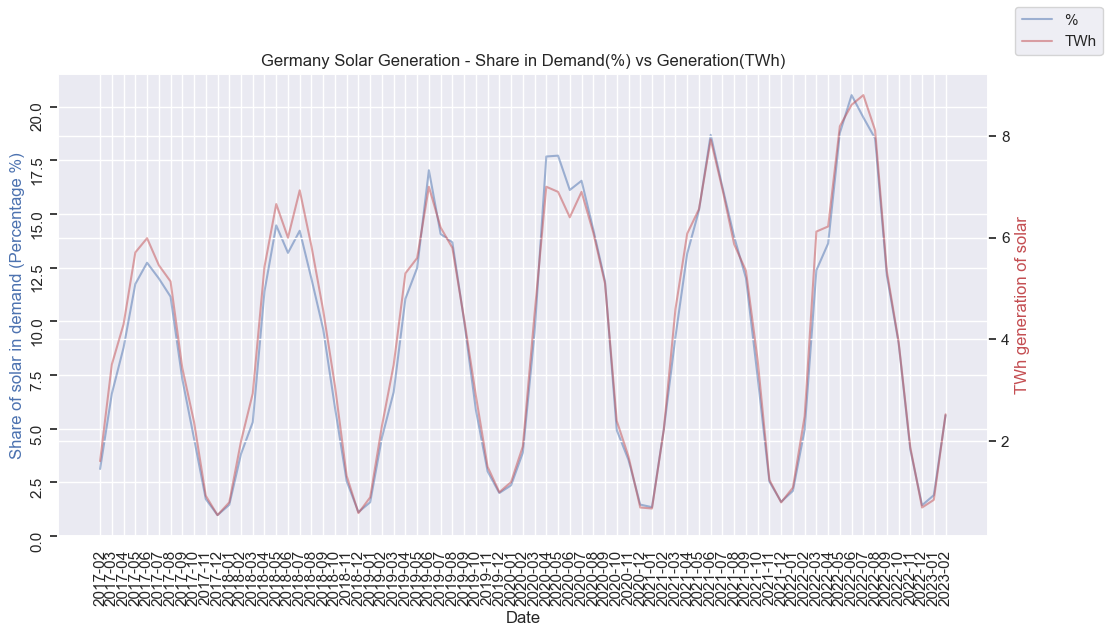

In [13]:
twoAxis("Germany")

But for a country like Türkiye, the data may change. In Turkish data, effect of Covid 19 policies are seen as a spike in blue (% - percent) line.

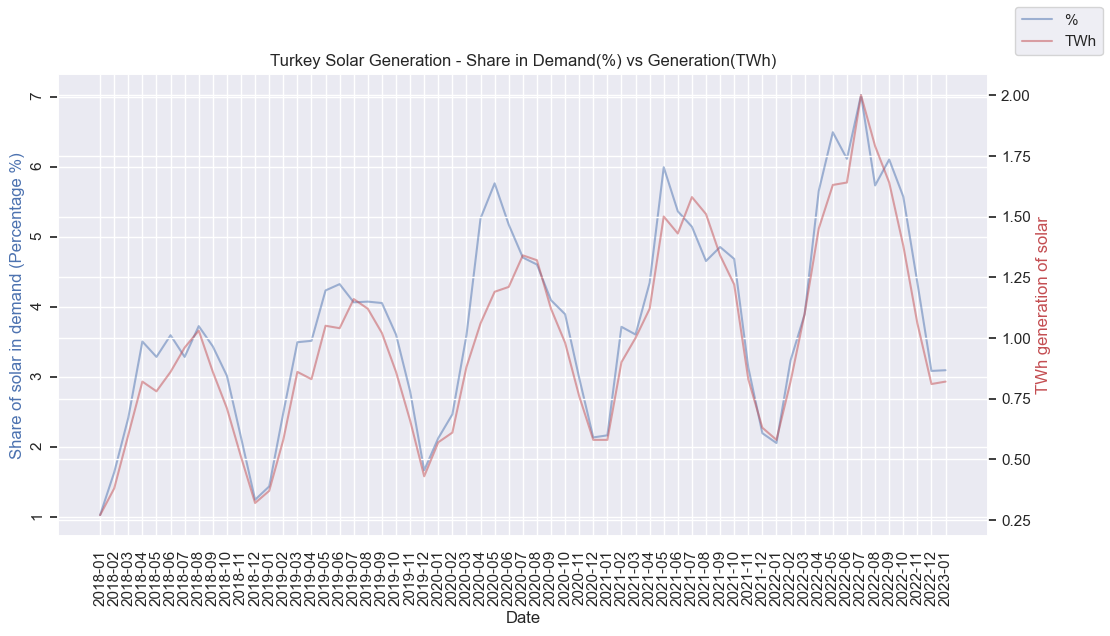

In [14]:
twoAxis("Turkey")

But if we compare two countries like China and Germany, % comparison and TWh comparison makes a lot of difference. For example in the following graph, Germant and China is compared in terms of solar generation as % share of demand.

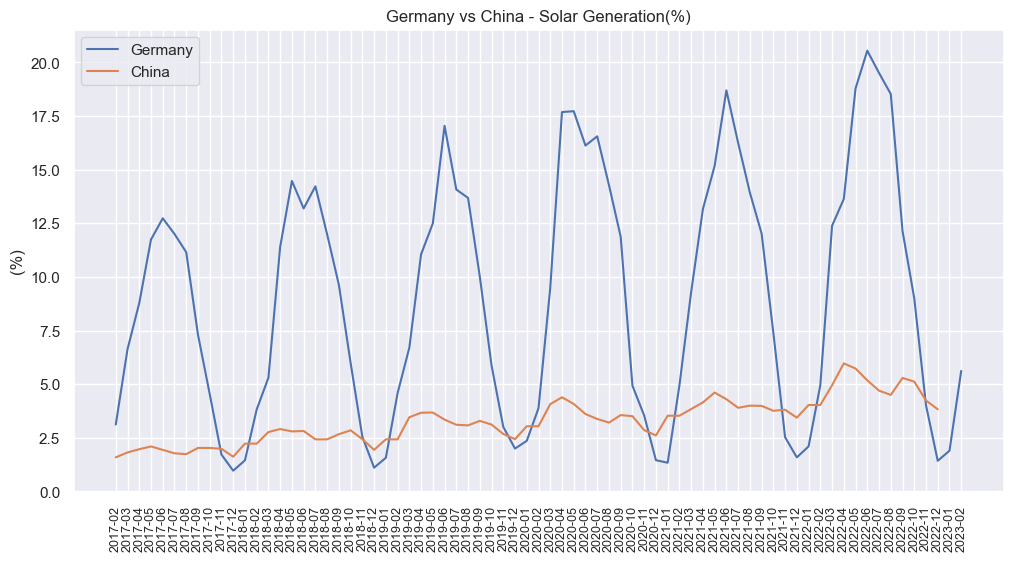

In [15]:
twoCountries_sameAxis('Germany','China',"%")

However, if we compare this two countries in absolute solar generation, the results are vastly different. One of the important factors is the growing demand of China, dampens % share of solar generation, despite higher generation levels

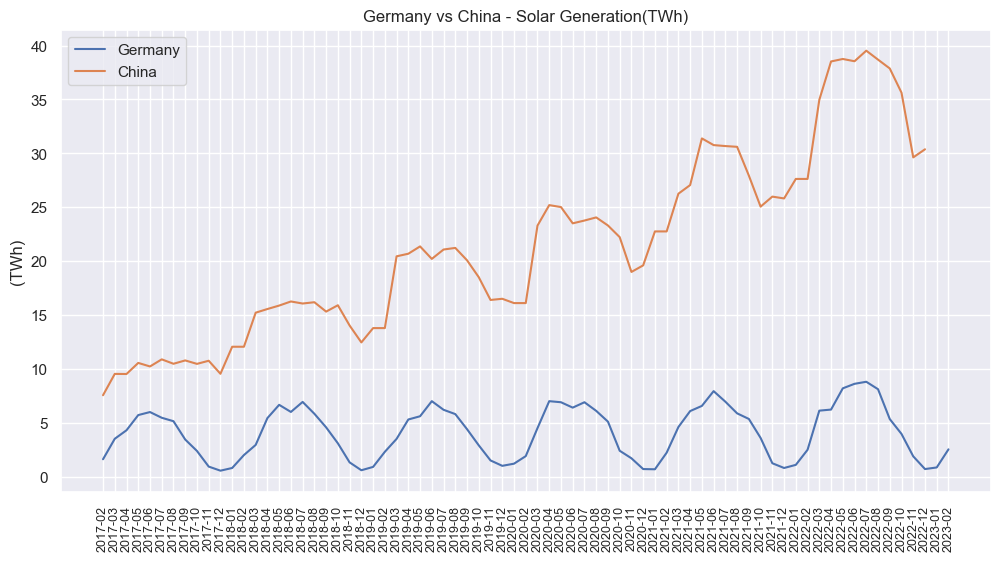

In [16]:
twoCountries_sameAxis('Germany','China',"TWh")

## Comparing Two Countries : Spain vs Germany

In the following graph, please check the difference in the curve structure. Spain's both winter and summer values are increasing, while for Germany winter is pretty static, lower than 2.5%

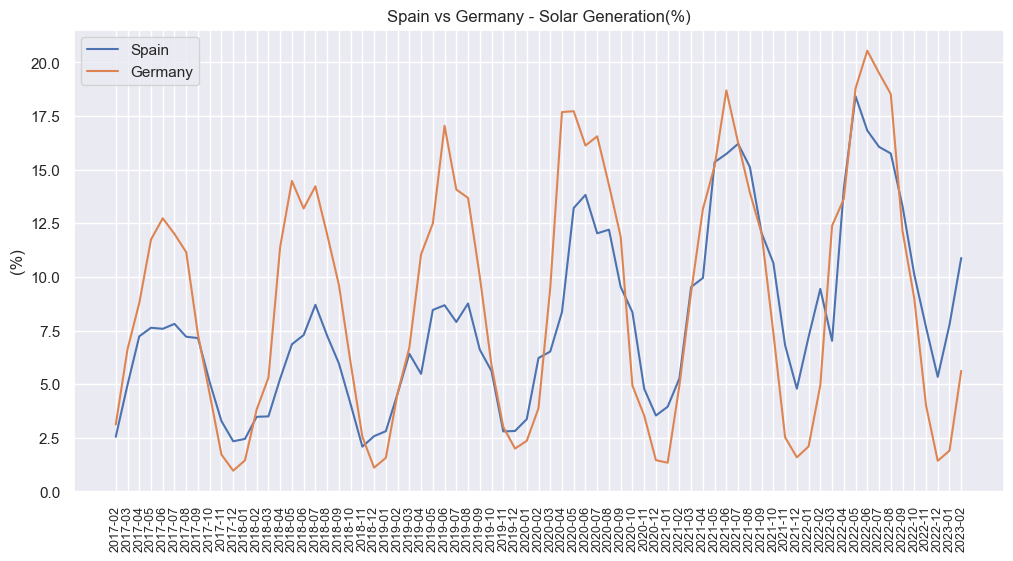

In [17]:
twoCountries_sameAxis("Spain","Germany")

Italy vs Spain is another interesting example. Italy behaves more like Germany in Winter. However Spain has an obviously increasing winter share

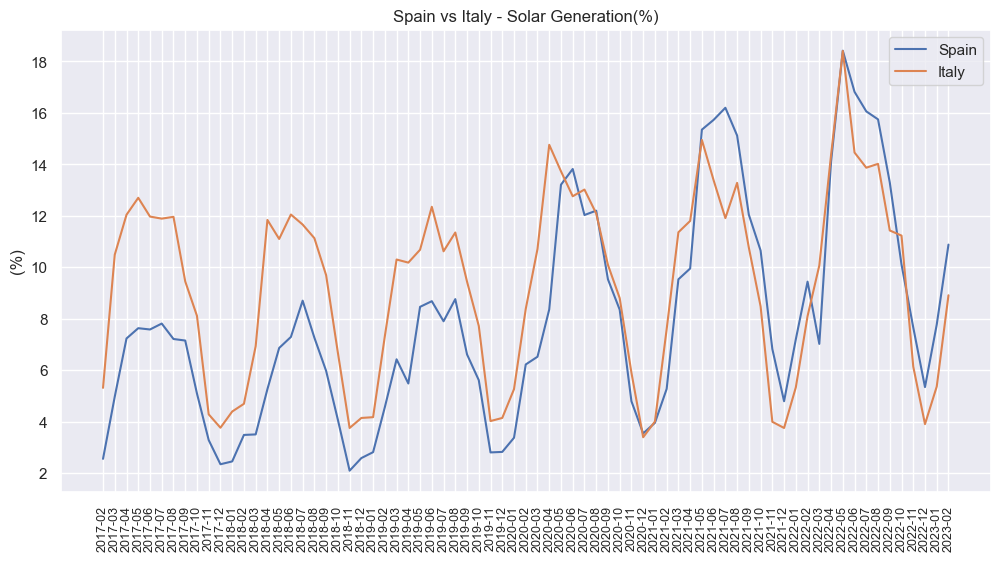

In [18]:
twoCountries_sameAxis("Spain","Italy")

#### The summer-winter inbalance between Türkiye and Poland

Another interesting example is Poland vs Türkiye. Poland has increased its solar generation tremendously, but winter-summer inbalance is much higher than Türkiye

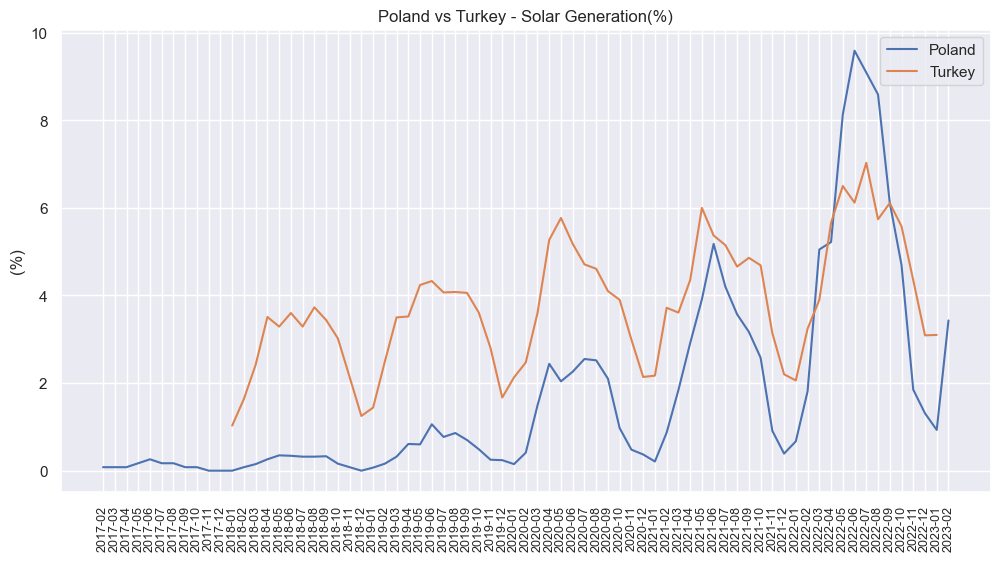

In [19]:
twoCountries_sameAxis("Poland","Turkey")

Denmark and Netherlands is another interesting case. It clearly shows the gravity of low solar share in generation during winter

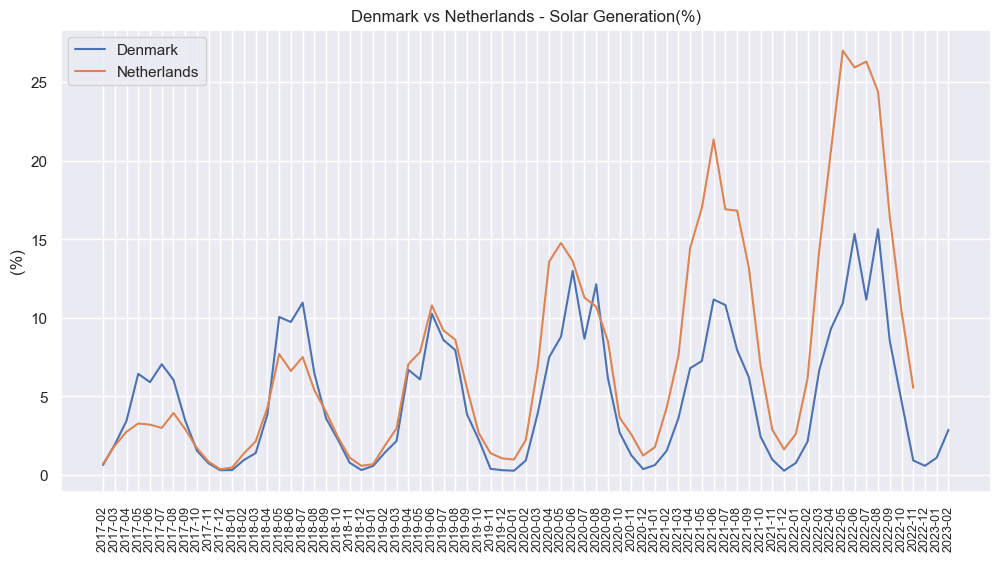

In [20]:
twoCountries_sameAxis("Denmark","Netherlands")

Germany and UK is another interesting example.

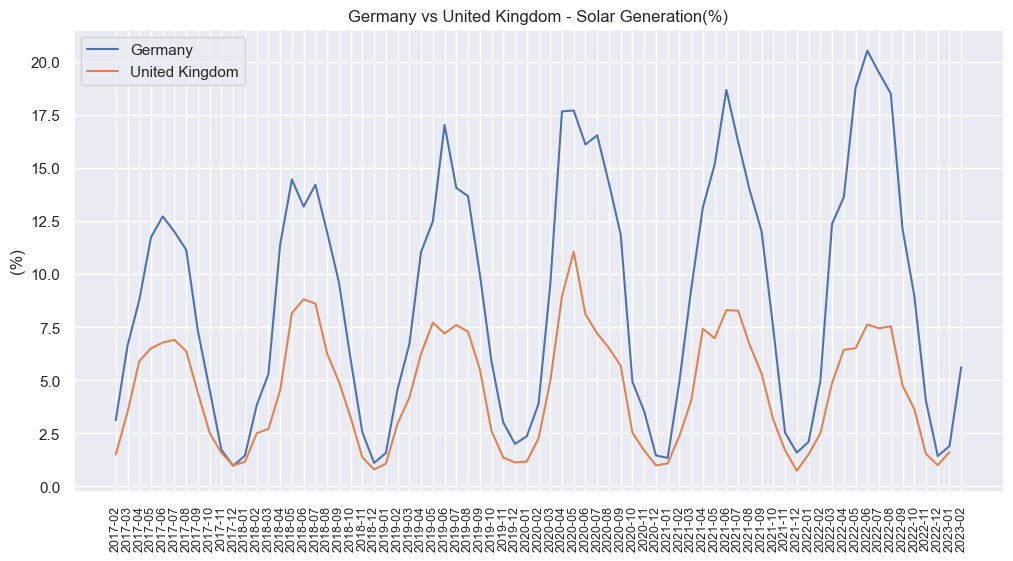

In [21]:
twoCountries_sameAxis("Germany", "United Kingdom")


In [22]:
df.Area.unique()

array(['Argentina', 'Asia', 'Australia', 'Austria', 'Bangladesh',
       'Belgium', 'Bolivia', 'Bosnia Herzegovina', 'Brazil', 'Bulgaria',
       'Burundi', 'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica',
       'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'EU', 'Europe', 'Finland', 'France',
       'G20', 'G7', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India',
       'Iran (Islamic Republic of)', 'Ireland', 'Italy', 'Japan', 'Kenya',
       'Kosovo', 'Latin America and Caribbean', 'Latvia', 'Lithuania',
       'Luxembourg', 'Malta', 'Mexico', 'Moldova', 'Mongolia',
       'Montenegro', 'Netherlands', 'New Zealand', 'Nigeria',
       'North America', 'North Macedonia', 'Norway', 'OECD', 'Oman',
       'Pakistan', 'Peru', 'Philippines (the)', 'Poland', 'Portugal',
       'Qatar', 'Romania', 'Russian Federation (the)', 'Serbia',
       'Singapore', 'Slovakia', 'Slovenia', 'South Africa', 'South Korea',
       'Spain', 'Sweden', '

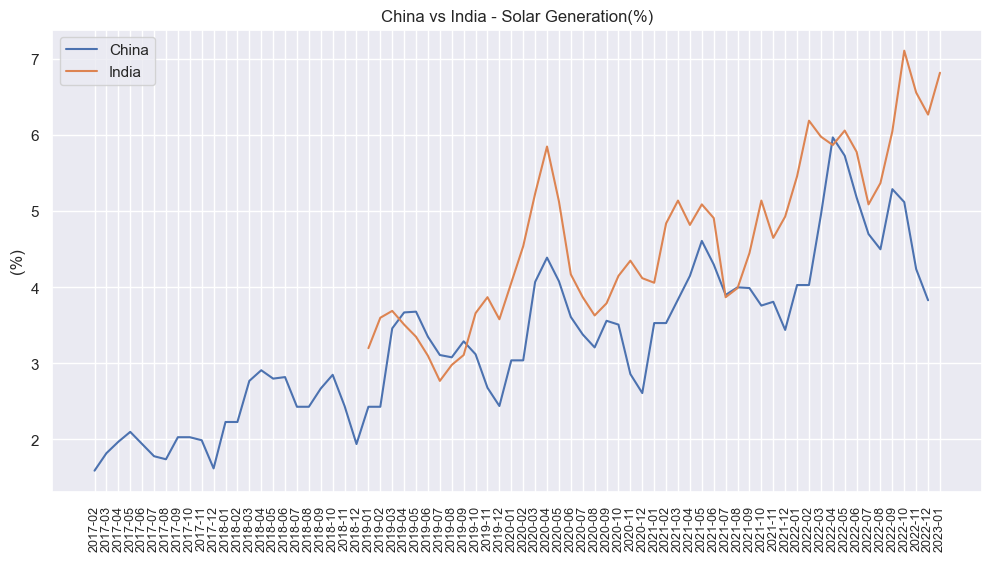

In [23]:
twoCountries_sameAxis("China","India")


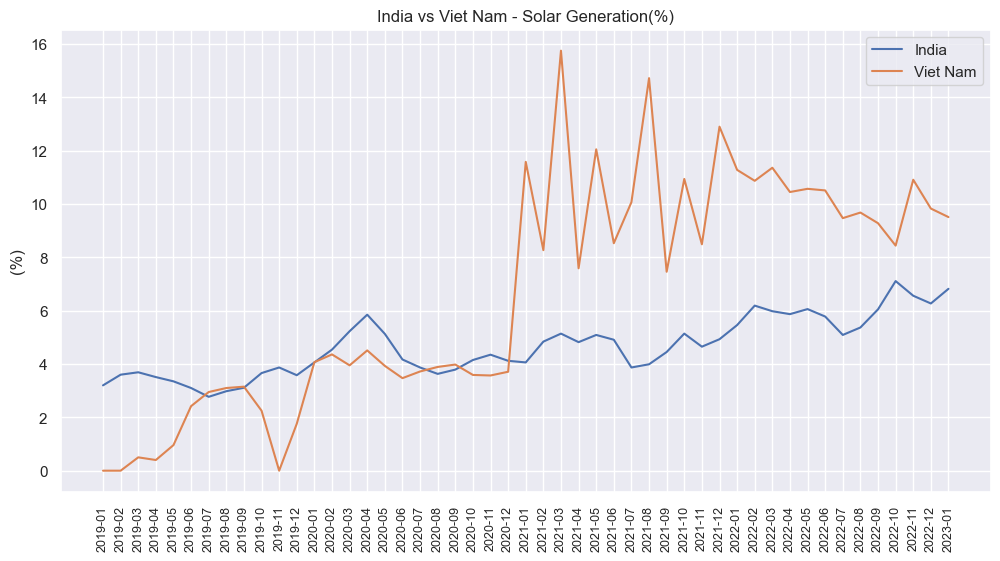

In [24]:
twoCountries_sameAxis("India","Viet Nam")
#twoCountries_sameAxis("Brazil","Viet Nam")

There are complimentary countries as well Such as Australia and Germany

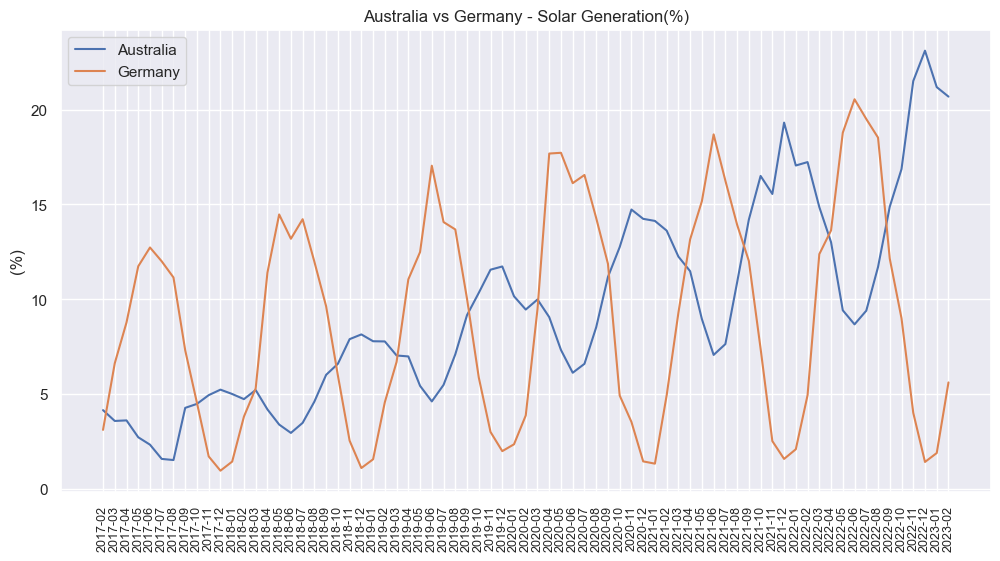

In [25]:
twoCountries_sameAxis("Australia","Germany")

## Solar Generation in Türkiye : How It Behaves During Winter Peak Demand Days

The following process merges two data
1. From the [Turkish energy market transparency platform](seffaflik.epias.com.tr) hourly electricity generation for all resources were downloaded. There are two kind of solar data. First one is licensed (utility scale), the other is unlicensed (less than 5 MW). But Turkish entreprenuers have applied for multiple sub-1MW and merged them practically. Therefore unlicensed solar generation is higher than utility scale
2. From the EPDK - Turkish energy regulator, monthly installed capacity for both Licensed and Unlicensed Solar MWs have been extracted.

This is hourly Turkish electricity generation data:

In [26]:
elektrik=pd.read_pickle("2021-2022-elektrik.pickle")

Now, EPDK's monthly solar installation numbers are loaded

In [27]:
a=pd.read_csv("gunes.csv",decimal=",",delimiter=";").set_index("ay")

In [28]:
a.index = pd.to_datetime(a.index)
a.index=a.index.to_period('M').to_timestamp('M')
a.index.name="date"

In this part, licensed(sun) and unlicensed(lsun) is summed. Total generation is licensed-utility scale (total) and unlicensed(ltotal - well sort of distributed) generation

In [29]:
elektrik["toplam"]=elektrik.total+elektrik.ltotal
elektrik["gunes"]=elektrik.sun+elektrik.lsun
saatlik_uretim=elektrik[["date","gunes","toplam"]].set_index("date")

The hourly data is converted to daily data

In [30]:
gunluk_uretim=saatlik_uretim.groupby(pd.Grouper(freq='D')).sum()

Solar Installed Capacity Growth is plotted

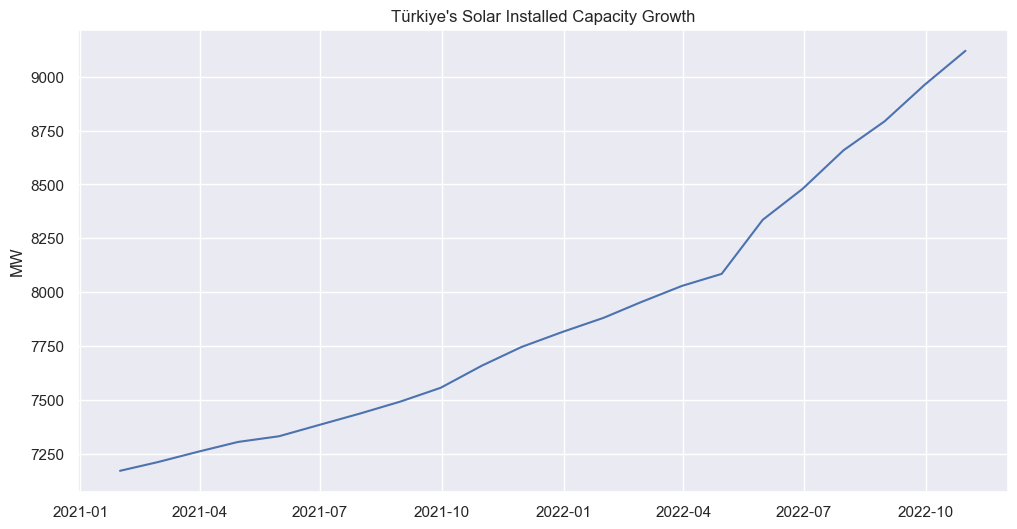

In [31]:
plt.plot(a);
plt.title("Türkiye's Solar Installed Capacity Growth");
plt.ylabel("MW");

This part may look complicated. But practically, we merge monthly installed capacity data with daily generation data.

In [32]:
brl=pd.merge(gunluk_uretim,a, how="outer",on="date")

In [33]:
brl_int=brl.interpolate(method ='linear', limit_direction ='forward').interpolate(method ='linear', limit_direction ='backward')

In [34]:
brl_int["gunluk"]=brl_int["gunesMW"]*24
brl_int["cf"]=brl_int["gunes"]/brl_int["gunluk"]

### How Turkish Solar Capacity Factor Changes Seasonally and Daily

In this part, we will zoom the data in daily instances to see seasonal and daily fluctuations
First, daily and 30 days moving average solar capacity factor is plotted

Text(0, 0.5, 'Percentage(%)')

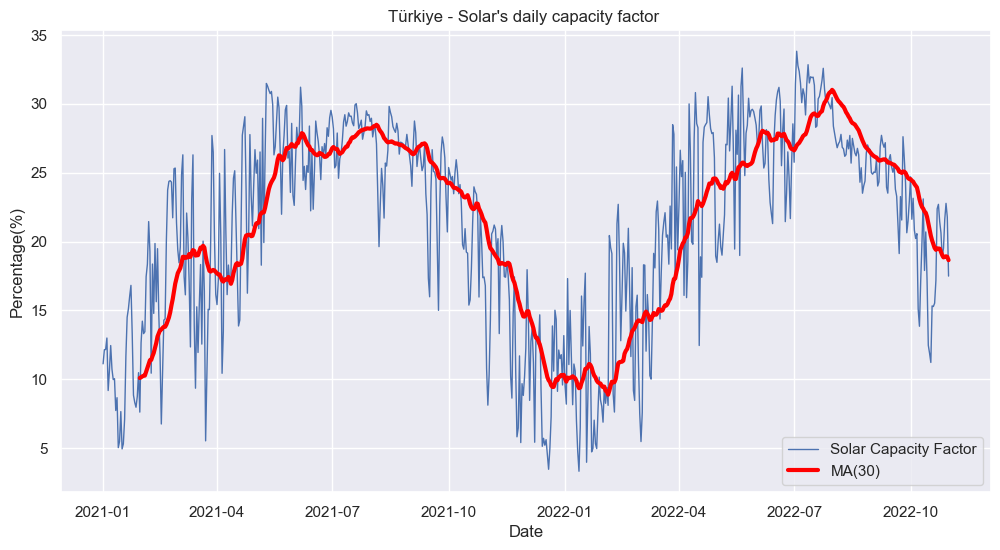

In [35]:
plt.plot(100*brl_int["cf"],linewidth=1,label="Solar Capacity Factor")
plt.plot(100*brl_int["cf"].rolling(30).mean(),linewidth=3, color="red", label="MA(30)")
plt.legend();

plt.title("Türkiye - Solar's daily capacity factor ");
plt.xlabel("Date")
plt.ylabel("Percentage(%)")

#### A Histogram to Display Skewness of the Data

Text(0.5, 1.0, 'The Histogram of Solar Capacity Factor')

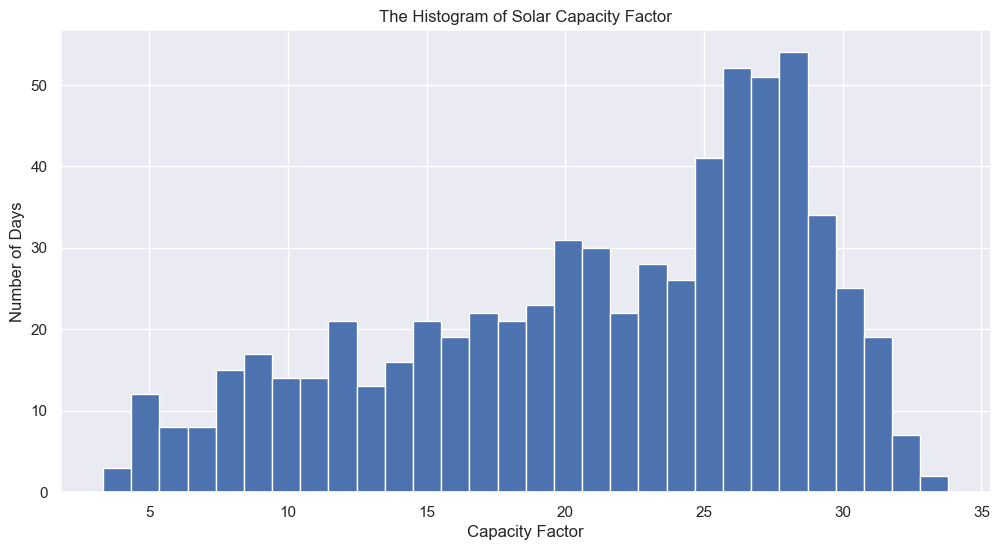

In [36]:
plt.hist(sorted(brl_int["cf"]*100),bins=30);
plt.xlabel("Capacity Factor")
plt.ylabel("Number of Days")
plt.title("The Histogram of Solar Capacity Factor")

In [37]:
sonyil=brl_int

### Winter demand and capacity factor

Türkiye's summer demand is generally higher than winter, due to coooling load. But if you look at the red line, there is also a winter peak. The gross demand in winter coincides with lowest daily capacity factors for solar. But we will have a more professional graph in the following line

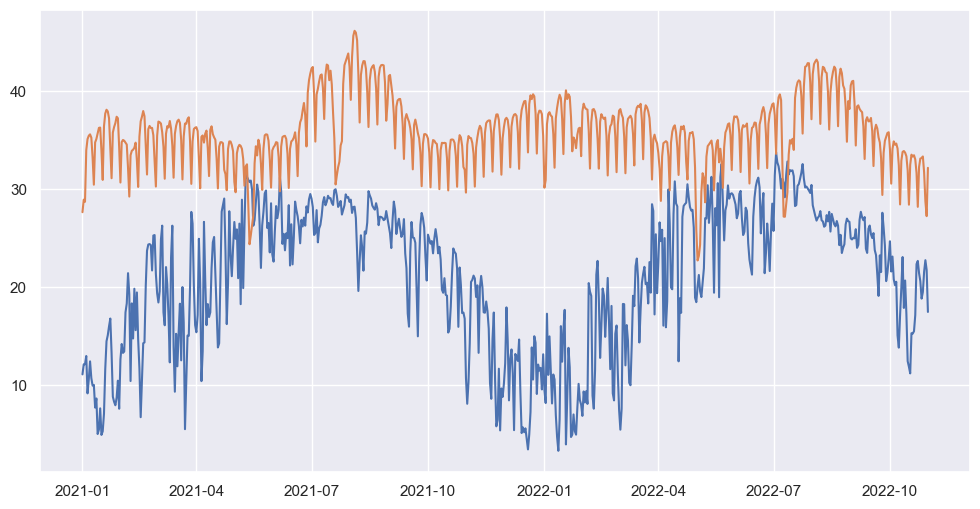

In [38]:
plt.plot(sonyil.cf*100, label="Capacity Factor of Solar(%)")
plt.plot(sonyil.toplam/25000,label="Total Gross Demand")

Now, the data is dissected from bas(head) to 120 days forward. Because on 2021, Dec 15, a cold, snowy weather hit most of the Türkiye. You can see the effect of snow on blue line for 2021-12-15. Also check the red line as demand data. While demand is peaking, capacity factor is going down

Text(0.5, 1.0, 'Türkiye - Solar Capacity Factor vs Electricity Demand - Kış Dönemi')

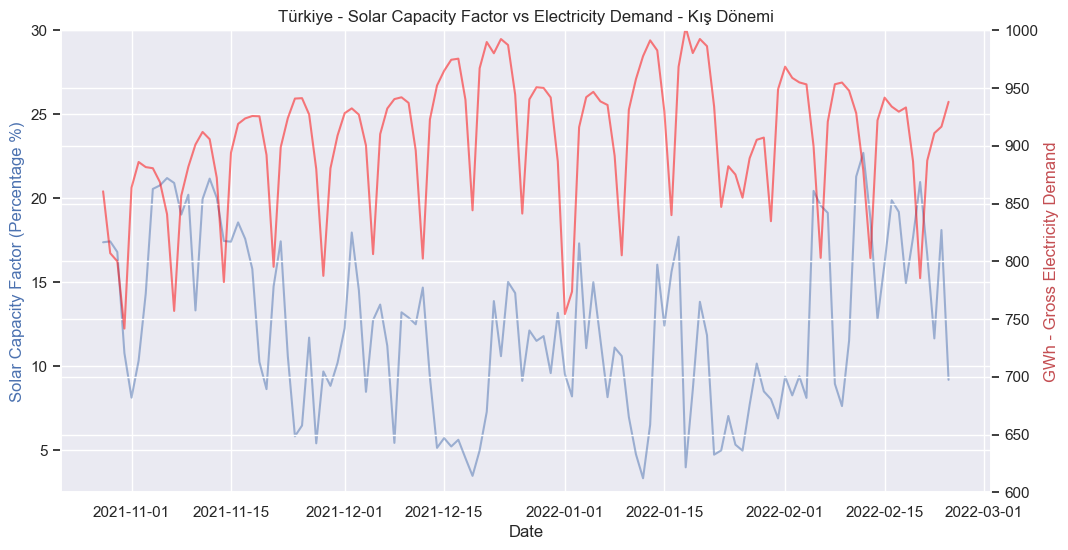

In [39]:
bas=300
son=bas+120
fig, ax1 = plt.subplots()
ax1.plot(100*sonyil.cf[bas:son], alpha=0.5)
ax2 = ax1.twinx()
ax2.plot(sonyil.toplam[bas:son]/1000, color="red", alpha=0.5)
ax2.set_ylim([6e2, 1e3])
ax1.set_ylim([2.5, 30])

ax1.set_xlabel('Date')
ax1.set_ylabel('Solar Capacity Factor (Percentage %)', color='b')
ax2.set_ylabel('GWh - Gross Electricity Demand', color='r')
plt.title("Türkiye - Solar Capacity Factor vs Electricity Demand - Kış Dönemi")

We can even zoom more

927288.9311111112

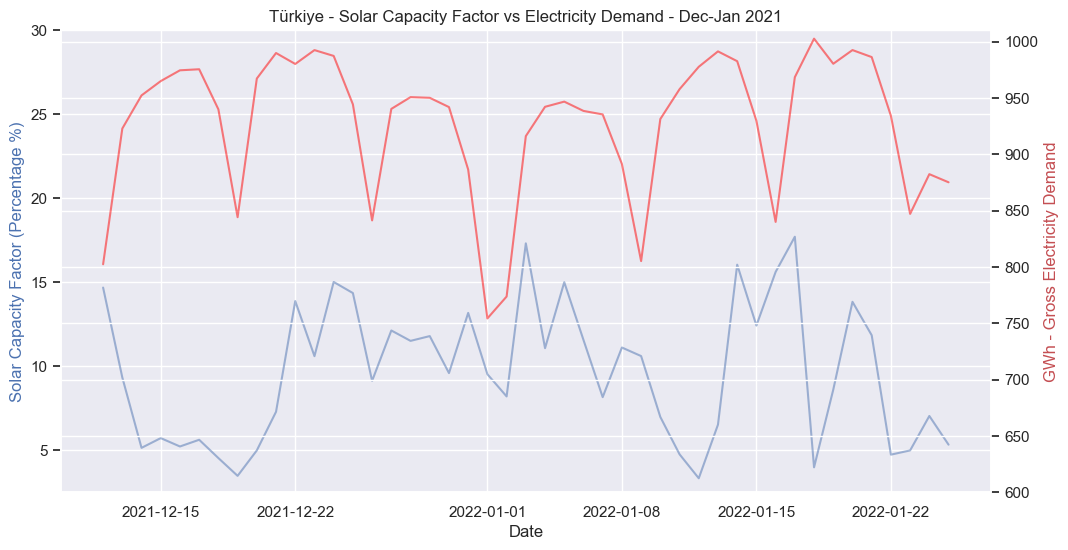

In [40]:
bas=345
son=bas+45
fig, ax1 = plt.subplots()
ax1.plot(100*sonyil.cf[bas:son], alpha=0.5)
ax2 = ax1.twinx()
ax2.plot(sonyil.toplam[bas:son]/1000, color="red", alpha=0.5)
ax2.set_ylim([6e2, 1.01e3])
ax1.set_ylim([2.5, 30])

ax1.set_xlabel('Date')
ax1.set_ylabel('Solar Capacity Factor (Percentage %)', color='b')
ax2.set_ylabel('GWh - Gross Electricity Demand', color='r')
plt.title("Türkiye - Solar Capacity Factor vs Electricity Demand - Dec-Jan 2021")

100*sonyil.cf[bas:son].mean()
sonyil.toplam[bas:son].mean()

Neverthless, solar is extremely helpful from April to October. So solar capacity factor is quite reliable for 6 months

Text(0.5, 1.0, 'Türkiye - Solar Capacity Factor vs Electricity Demand - Summer')

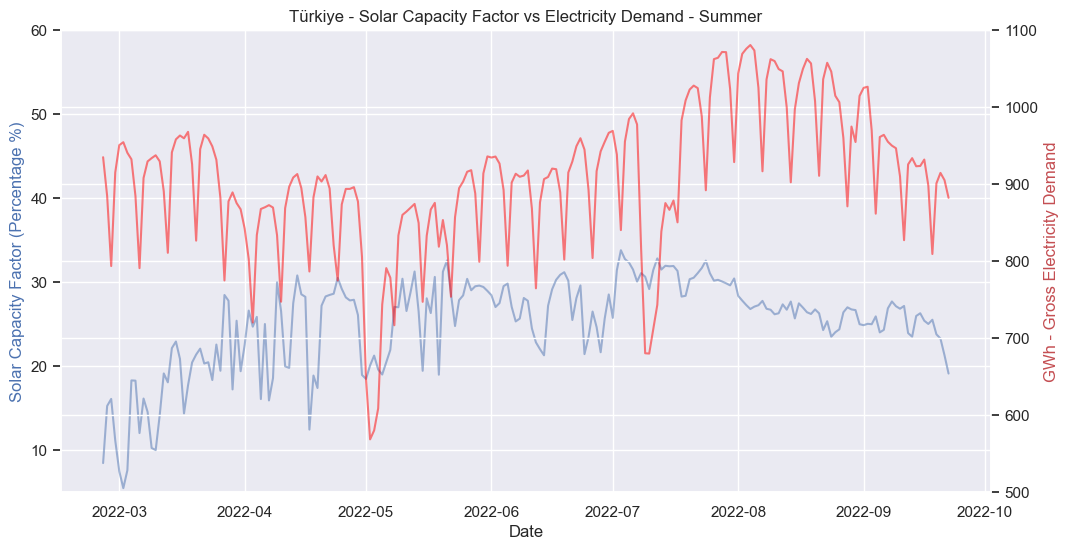

In [41]:
bas=420
son=bas+210
fig, ax1 = plt.subplots()
ax1.plot(100*sonyil.cf[bas:son], alpha=0.5)
ax2 = ax1.twinx()
ax2.plot(sonyil.toplam[bas:son]/1000, color="red", alpha=0.5)
ax2.set_ylim([5e2, 1.1e3])
ax1.set_ylim([5, 60])

ax1.set_xlabel('Date')
ax1.set_ylabel('Solar Capacity Factor (Percentage %)', color='b')
ax2.set_ylabel('GWh - Gross Electricity Demand', color='r')
plt.title("Türkiye - Solar Capacity Factor vs Electricity Demand - Summer")

Now, if we look at the whole data set, 2022 January is an interesting point to observe

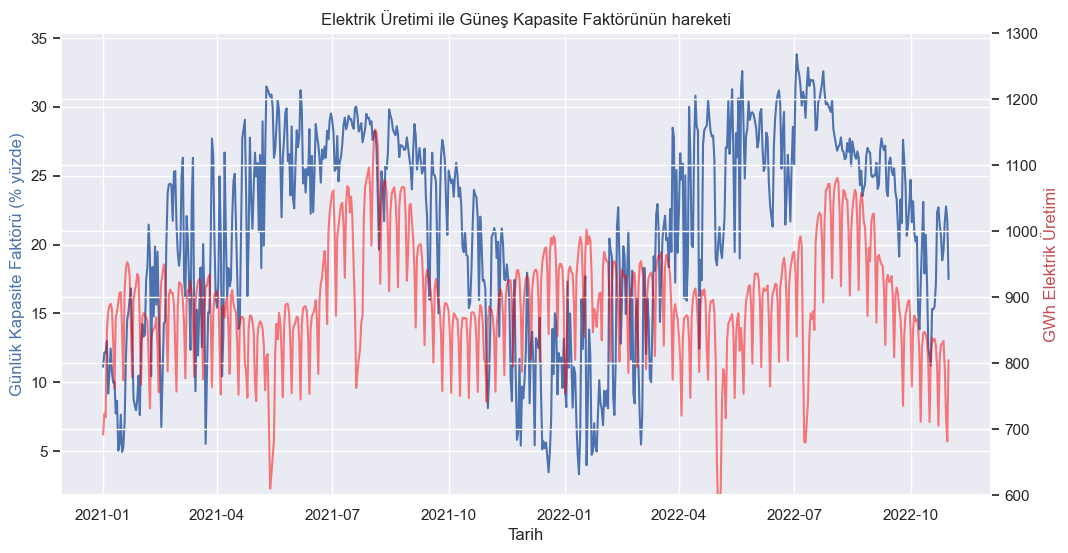

In [42]:
fig, ax1 = plt.subplots()
ax1.plot(100*sonyil.cf)
ax2 = ax1.twinx()
ax2.plot(sonyil["toplam"]/1000, color="red", alpha=0.5)
ax2.set_ylim([6e2, 1.3e3])
ax1.set_xlabel('Tarih')
ax1.set_ylabel('Günlük Kapasite Faktörü (% yüzde)', color='b')
ax2.set_ylabel('GWh Elektrik Üretimi', color='r')
plt.title("Elektrik Üretimi ile Güneş Kapasite Faktörünün hareketi");

As a last point, we should see the decreasing correlation in winter and increasing one in summer. The two dips are religious holidays in Türkiye. 

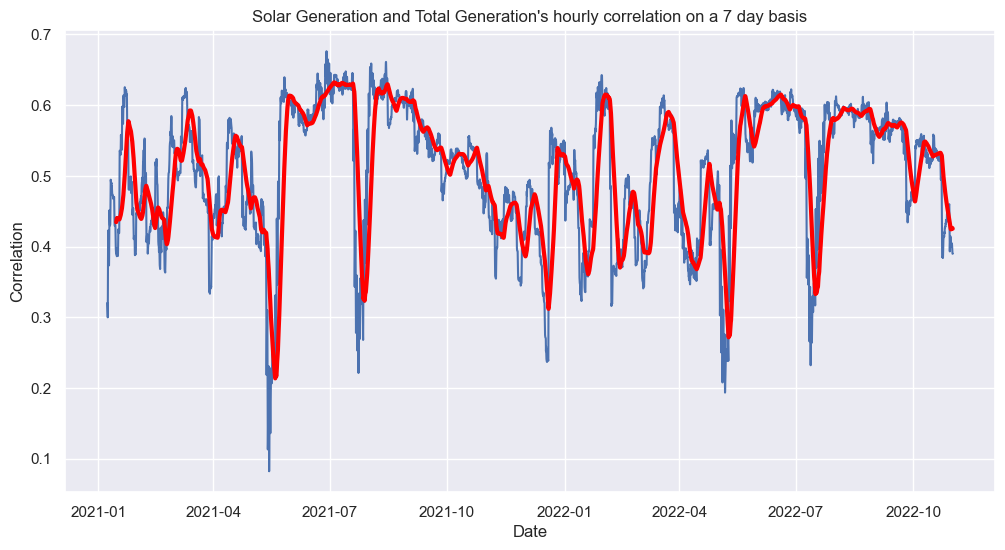

In [43]:
cor=saatlik_uretim["gunes"].rolling(7*24).corr(saatlik_uretim["toplam"])
plt.plot(cor)
cor=saatlik_uretim["gunes"].rolling(7*24).corr(saatlik_uretim["toplam"]).rolling(24*7).mean()
plt.plot(cor, color="red", linewidth=3)
plt.xlabel("Date")
plt.ylabel("Correlation")
plt.title("Solar Generation and Total Generation's hourly correlation on a 7 day basis");
